### All data was taken from "Data Gathering | Genshin Impact" Discord server (https://discord.gg/ydwdYmr). 
### Thanks to all the people from the server and Acheron-X for the data.

## Dependecies Imports

In [496]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## File to dataframe

In [490]:
# Open file
acheron_x_file = 'artdrops.xlsx'
acheron_x_df = pd.read_excel(acheron_x_file)

# Clean dataframe
dictio = {}
dictio2 = {}
for i in acheron_x_df.columns:
    dictio[i] = acheron_x_df[i][1]
for i in range(df.shape[0]):
    dictio2[i+2] = i

acheron_x_df = acheron_x_df.rename(columns=dictio, index=dictio2)
acheron_x_df = acheron_x_df.iloc[2:,1:8]
acheron_x_df.head()

,Artifact Type,★,Main Stat,Substat 1,Substat 2,Substat 3,Substat 4
0,Flower,5,HP,CR,CD,EM,DEF%
1,Feather,5,ATK,ATK%,DEF%,CD,DEF
2,Flower,4,HP,DEF,DEF%,ER,NaN
3,Flower,4,HP,ER,EM,CR,NaN
4,Goblet,4,HP%,ER,EM,DEF%,NaN


## Operations

In [529]:
def get_type_total(tp, artifact_df):
    """
    Return the total number of ocurrences of a certain type of artifact
    
    tp: String of the type of artifact
    artifact_df: Dataframe to extract the data
    Reutrn -> type_total
    """
    type_total = artifact_df.loc[artifact_df['Artifact Type'] == tp].shape[0]
    return type_total
    

def get_sub_stat_total(stat, artifact_df):
    """
    Return the total number of ocurrences of a certain sub stat
    
    stat: String of the desired stat
    artifact_df: Dataframe to extract the data
    Reutrn -> stat_total
    """
    stat_total =  artifact_df.loc[artifact_df['Substat 1'] == stat].shape[0]
    stat_total += artifact_df.loc[artifact_df['Substat 2'] == stat].shape[0]
    stat_total += artifact_df.loc[artifact_df['Substat 3'] == stat].shape[0]
    stat_total += artifact_df.loc[artifact_df['Substat 4'] == stat].shape[0]
    return stat_total


def get_main_stat_total(stat, artifact_df):
    """
    Return the total number of ocurrences of a certain main stat
    
    stat: String of the desired stat
    artifact_df: Dataframe to extract the data
    Reutrn -> stat_total
    """
    stat_total =  artifact_df.loc[artifact_df['Main Stat'] == stat].shape[0]
    return stat_total


def get_all_sub_stats(artifact_df):
    """
    Return a list of all the posible sub stats excluding NaNs
    
    artifact_df: Dataframe to extract the data
    Reutrn -> return_list
    """
    sub_stats = list(artifact_df['Substat 1'])
    sub_stats += list(artifact_df['Substat 2'])
    sub_stats += list(artifact_df['Substat 3'])
    sub_stats += list(artifact_df['Substat 4'])
    sub_stats = list(set(sub_stats))
    list_clean = [x for x in sub_stats if x == x]
    return_list = []
    for i in list_clean:
        if i != 'Phys%' and i != 'Ele%' and i != 'Heal':
            i = i.upper()
        return_list.append(i)
    return return_list


def get_all_main_stats(artifact_df):
    """
    Return a list of all the posible main stats excluding NaNs
    
    artifact_df: Dataframe to extract the data
    Reutrn -> return_list
    """
    main_stats = list(artifact_df['Main Stat'])
    main_stats = list(set(main_stats))
    list_clean = [x for x in main_stats if x == x]
    return_list = []
    for i in list_clean:
        if i != 'Phys%' and i != 'Ele%' and i != 'Heal':
            i = i.upper()
        return_list.append(i)
    return return_list


def df_create_sgc(art):
    """
    Returns a dataframe with the data of 1 type of artifact (3★, 4★ and 5★ %, each stat probability, etc.)
    
    art: String of the type of artifact
    Reutrn -> artifact
    """
    artifact_df = acheron_x_df.loc[acheron_x_df['Artifact Type'] == art]
    stars_3 = artifact_df.loc[artifact_df['★'] == 3].shape[0]
    stars_4 = artifact_df.loc[artifact_df['★'] == 4].shape[0]
    stars_5 = artifact_df.loc[artifact_df['★'] == 5].shape[0]
    total = stars_3 + stars_4 + stars_5
    
    df_main_stats = get_all_main_stats(artifact_df)
    df_sub_stats = get_all_sub_stats(artifact_df)
    all_stats = list(set(df_main_stats + df_sub_stats))
    df_columns = ['Total Smaple', '4★%', '5★%'] + all_stats
    df_dict = {df_columns[0]: [total, '-'], df_columns[1]: [stars_3/total, '-']}
    df_dict.update({df_columns[2]: [stars_4/total, '-'], df_columns[3]: [stars_5/total, '-']})
    
    for i in df_columns[4:]:
        if i in df_main_stats and i in df_sub_stats:
            df_dict[i] = [get_main_stat_total(i, artifact_df)/total, get_sub_stat_total(i, artifact_df)/total]
        elif i in df_main_stats and not i in df_sub_stats:
            df_dict[i] = [get_main_stat_total(i, artifact_df)/total, '-']
        elif not i in df_main_stats and i in df_sub_stats:
            df_dict[i] = ['-', get_sub_stat_total(i, artifact_df)/total]
    artifact = pd.DataFrame(df_dict, index = ['Main Stats', 'Sub Stats'])
    artifact.index.name = art
    return artifact

In [530]:
def calc_prob(artifact, main_stat, sub_stat_list):
    """
    Return the probability (x1, not %) of an artifact
    
    artifact: String of the type of artifact
    main_stat: String of the main stat of the wanted artifact
    sub_stat_list: List of strings of the desired sub stats for an artifact
    Return -> sub_stat_prob*main_stat_prob
    """
    df_artifact = df_create_sgc(artifact)
    sub_stat_list = list(set(sub_stat_list))
    main_stat_prob = 1
    sub_stat_prob = 1
    
    if artifact[0] == 'F' and main_stat:
        return '{} only has 1 posible main stat, please leave main stat field empty'.format(artifact)
    if main_stat in sub_stat_list:
        return "An artifact can't have a substat that is the same as the main stat"
    if artifact[0] != 'F':
        if main_stat != '' and df_artifact[main_stat]['Main Stats'] != '-':
            main_stat_prob *= df_artifact[main_stat]['Main Stats']

    for i in sub_list:
        sub_stat_prob *= df_artifact[i]['Sub Stats']
    return sub_stat_prob*main_stat_prob


def calc_resin(prob):
    """
    Return a list of the suposed number of runs and its resin cost
    
    prob: Probaility of getting a certain artifact
    Return -> [runs_to1, runs_to1*20]
    """
    runs_to1 = math.ceil(1/prob)
    return [runs_to1, runs_to1*20]


def calc_days(resin):
    """
    Return a list of the number of days to use a quantity of resin 
    
    resin: Quantity of resin (int)
    Return -> days
    """
    days = list()
    
    # 160 Resin x Day:
    days.append(math.ceil(resin/160))
    
    # 180 Resin x Day:
    days.append(math.ceil(resin/180))
    
    return days


def results(artifact, main_stat, sub_list):
    """
    Prints the results of all the operations
    
    artifact: String of the type of the artifact
    main_stat: String of the main stat of an artifact
    sub_list: List of strings of the desired sub stats for an artifact
    Void
    """
    print('Artifact Objective: \n\t- Type: {}\n\t- Main Stat: {}\n\t- Sub Stats: {}'.format(artifact, main_stat, sub_list))
    
    # Probability of a certain artifact
    prob = calc_prob(artifact, main_stat, sub_list)
    print('- Probability: {:.4f}%'.format(prob*100))

    # Resin cost
    runs, resin = calc_resin(prob)
    print('- It takes {} runs and that is {} resin'.format(runs, resin))

    # Days count
    days = calc_days(resin)
    print('- That means:\n\t- {} days spending 160 resin x day\n\t- {} days spending 180 resin x day'. format(days[0], days[1]))

def calc_full_set(role, phys = False):
    """
    Prints the results of all operations for a full set of artifacts
    
    role: String with the role of the set
    phys: Boolean that indicates if the goblet is Physical% or Elemental% (For DPS)
    Void
    """
    artifacts = ['Flower', 'Feather', 'Sands', 'Goblet', 'Circlet']
    days = [0, 0]
    resin_total = 0
    runs_total = 0
    if role == 'DPS':
        main_stats = ['', '', 'ATK%', 'Ele%', 'CD']
        sub_stats = [['CD', 'CR', 'ATK%'], ['CD', 'CR', 'ATK%'], ['CD', 'CR'], ['CD', 'CR', 'ATK%'], ['CR', 'ATK%']]
        if phys == True:
            main_sats[3] = 'Phys%'
    
    for i in range(len(artifacts)):
        prob = calc_prob(artifacts[i], main_stats[i], sub_stats[i])
        runs, resin = calc_resin(prob)
        resin_total += resin
        runs_total += runs
        days_tmp = calc_days(resin)
        days[0] += days_tmp[0]
        days[1] += days_tmp[1]
    phy = 'elemental' if phys == False else 'physical'

    print('To get a default DPS build with {} DMG bonus on Goblet:\n'.format(phy))
    print('It takes {} runs and that is {} resin'.format(runs_total, resin_total))
    print('That means:\n\t- {} days spending 160 resin x day\n\t- {} days spending 180 resin x day'.format(days[0], days[1]))

## Results 

In [531]:
# Results of a single artifact
artifact = 'Goblet'
main_stat = 'Ele%'
sub_list=['CD', 'CR', 'ATK%']

results(artifact, main_stat, sub_list)

Artifact Objective: 
	- Type: Goblet
	- Main Stat: Ele%
	- Sub Stats: ['CD', 'CR', 'ATK%']
- Probability: 0.2089%
- It takes 479 runs and that is 9580 resin
- That means:
	- 60 days spending 160 resin x day
	- 54 days spending 180 resin x day


In [532]:
# Results of a set of artifacts (5 different pieces)
calc_full_set('DPS')

To get a default DPS build with elemental DMG bonus on Goblet:

It takes 3210 runs and that is 64200 resin
That means:
	- 403 days spending 160 resin x day
	- 359 days spending 180 resin x day


## Plots

### Main Stat plot

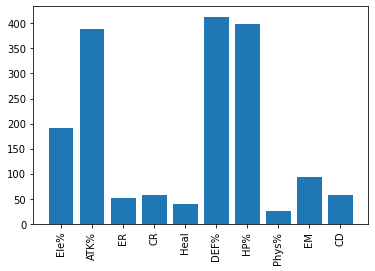

{'Ele%': 192, 'ATK%': 388, 'ER': 52, 'CR': 58, 'Heal': 40, 'DEF%': 413, 'HP%': 399, 'Phys%': 25, 'EM': 94, 'CD': 57}


In [533]:
not_main_stats = ['ATK', 'HP']
all_main_stats = [x for x in get_all_main_stats(acheron_x_df) if x not in not_main_stats]
stats = [get_main_stat_total(i, acheron_x_df) for i in all_main_stats]
plt.bar(all_main_stats, stats)  
plt.xticks(rotation=90)
plt.show()

zip_iterator = zip(all_main_stats, stats)
numbers = dict(zip_iterator)
print(numbers)

### Sub Stat plot

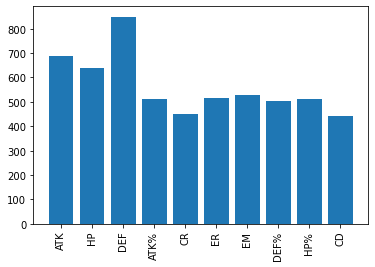

{'ATK': 687, 'HP': 640, 'DEF': 850, 'ATK%': 513, 'CR': 450, 'ER': 517, 'EM': 529, 'DEF%': 502, 'HP%': 513, 'CD': 443}


In [534]:
not_sub_stats = ['Phys%', 'Ele%', 'Heal']
all_sub_stats = [x for x in get_all_sub_stats(acheron_x_df) if x not in not_sub_stats]
stats = [get_sub_stat_total(i, acheron_x_df) for i in all_main_stats]
plt.bar(all_sub_stats, stats)  
plt.xticks(rotation=90)
plt.show()

zip_iterator = zip(all_sub_stats, stats)
numbers = dict(zip_iterator)
print(numbers)

### Artifact Type Plot

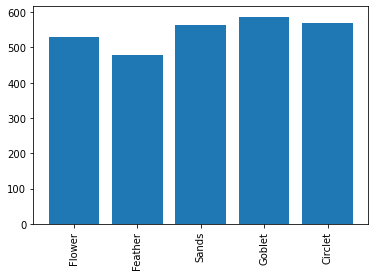

{'Flower': 530, 'Feather': 479, 'Sands': 563, 'Goblet': 587, 'Circlet': 568}


In [537]:
all_types = ['Flower', 'Feather', 'Sands', 'Goblet', 'Circlet']
total_types = [get_type_total(i, acheron_x_df) for i in all_types]
plt.bar(all_types, total_types)  
plt.xticks(rotation=90)
plt.show()

zip_iterator = zip(all_types, total_types)
numbers = dict(zip_iterator)
print(numbers)

## Conclusions
To get and complet set of "good" artifacts (Flower, Feather, Sands, Goblet and Circlet) is hard for f2p people. It takes almost a year to farm those 5 artifacts and more than 63k resin, and just to build 1 character.  
The sample size is of about 2700 artifcat drops so even if it's not super large I think is at least big enough to make some simple statistics like I did.  
  
Clearly this is a problem. 1 years to farm a good set? (And this data takes in count some 3★ artifacts and excludes enhancement rolls). I hope MiHoYo fixes this.
  
Also, the rng is weighted. In the plots is obvious that we're getting more artifacts with DEF% and HP% as main stats. In the case of sub stats is worse, the DEF drop in this sample is a lot higher than the others stats and the other 2 flat sub stats are more abundant the the other stats. And even if I didn't take in count rolls during enhancement, it will roll in HP and DEF flat...
    
    
    
    

As I said in the beggining, thanks for Acheron-X and the people from the "Data Gathering | Genshin Impact" Discord server (https://discord.gg/ydwdYmr)

<div style="text-align: right"> - daload </div>